# Perceptroni Multi-Strato

I _Perceptroni Multi-Strato_ (_Multi-Layer Perceptron_, **MLP**) sono l'esempio tipico di _Rete Neurale_ (_Neural Network:, **NN**).

## MLP in Breve

Gli MLP sono un particolare tipo di _feedforward_ NN (cioè senza ricorsività/cicli nella sua struttura) caratterizzato da una sequenza di _strati completamente connessi_ (_fully-connected layers_, *FC Layers*).

------------------------------
**"DEFINIZIONE"** _(Funzione caratterizzante un Fully-Connected Layer)_**:**

Sia $L$ un FC layer di $m\in\mathbb{N}$ unità con funzione di attivazione $\sigma:\mathbb{R}\rightarrow\mathbb{R}$ e sia $L$ (completamente) connesso con un altro livello di $n$ unità. Il layer $L$ è quindi caratterizzato dalla funzione $\mathcal{L}:\mathbb{R}^n\rightarrow\mathbb{R}^m$ tale che

\begin{equation}
\mathcal{L}(\boldsymbol{x}) := \boldsymbol{\sigma}\left(W\boldsymbol{x} + \boldsymbol{b}\right)\,,\quad \forall \ \boldsymbol{x}\in\mathbb{R}^n\,,
\end{equation}
dove:
- $W\in\mathbb{R}^{m\times n}$ è la matrice dei pesi del livello $L$;
- $\boldsymbol{b}\in\mathbb{R}^m$ è il vettore dei bias
- $\boldsymbol{\sigma}:\mathbb{R}^m\rightarrow\mathbb{R}^m$ è una funzione vettoriale che applica elemento-per-elemento la funzione $\sigma$.
------------------------------

------------------------------
**"DEFINIZIONE"** _(Input Layer)_**:**

Un _Input Layer_ di $n\in\mathbb{N}$ unità è un layer che "_legge_" vettori di $\mathbb{R}^n$ e li "_invia_" ai layer successivi con lui connessi.

------------------------------

-----------------

**"DEFINIZIONE"** _(Funzione caratterizzante un Multi-Layer Perceptron)_**:**

Sia dato un MLP costituito da un input layer $L^{(0)}$ di $n\in\mathbb{N}$ unità, seguito da una sequenza di FC layers $L^{(1)},\ldots ,L^{(H)}, L^{(H+1)}$ connessi uno dopo l'altro. In particolare, i layer $L^{(1)},\ldots ,L^{(H)}$ sono definiti _strati nascosti_ (_hidden layers_) mentre $L^{(H+1)}$ è definito _strato di output_ (_output layer_).

L'MLP in questione è quindi rappresentato da una funzione $\hat{\boldsymbol{F}}:\mathbb{R}^n\rightarrow \mathbb{R}^m$ tale che

\begin{equation}
\hat{\boldsymbol{F}}(\boldsymbol{x}) : \mathbb{R}^n \xrightarrow[]{\mathcal{L}^{(1)}} \mathbb{R}^{n_1} \xrightarrow[]{\mathcal{L}^{(2)}} \cdots \xrightarrow[]{\mathcal{L}^{(H)}} \mathbb{R}^{n_H}\xrightarrow[]{\mathcal{L}^{(H+1)}}\mathbb{R}^m
\end{equation}

e in particolare 

\begin{equation}
\hat{\boldsymbol{F}}(\boldsymbol{x}) = \boldsymbol{\sigma}^{(H+1)}\left( W^{(H+1)}\boldsymbol{\sigma}^{(H)}\left(\cdots \left( W^{(2)}\boldsymbol{\sigma}^{(1)}\left(W^{(1)}\boldsymbol{x} + \boldsymbol{b}^{(1)}\right)+\boldsymbol{b}^2\right) \cdots\right)  + \boldsymbol{b}^{(H+1)}\right)\,,\quad \forall \ \boldsymbol{x}\in\mathbb{R}^n\,,
\end{equation}

dove:
- $W^{(h)}$, $\boldsymbol{b}^{(h)}$, $\sigma^{(h)}$, sono rispettivamente i pesi, i bias e la funzione di attivazione del layer $h$-esimo, per ogni $h=1,\ldots , H+1$;
- $n_h\in\mathbb{N}$ è il numero di unità del layer $h$-esimo, per ogni $h=1,\ldots ,H$;
- $m\in\mathbb{N}$ è il numero di unità dell'output layer $L^{(H+1)}$.


-----------------

-----------------

**OSSERVAZIONE** _($\hat{\boldsymbol{F}}$ come Funzione Parametrica)_**:** 

La funzione $\hat{\boldsymbol{F}}$ caratterizzante un MLP è, come le funzioni di tutti gli altri algoritmi di Machine Learning (ML) una funzione parametrica con parametri i pesi $W^{(h)}$ ed i bias $\boldsymbol{b}^{(h)}$. Indicando con $\boldsymbol{w}$ il vettore ottenuto dalla concatenazione delle vettorializzazioni di tutti i pesi $W^{(h)}$ e di tutti i bias $\boldsymbol{b}^{(h)}$, possiamo esplicitare la dipendenza dell'MLP da questi parametri con la seguente notazione:

\begin{equation}
\hat{\boldsymbol{F}}(\ \cdot \ \,;\, \boldsymbol{w})\quad \text{oppure} \quad \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\ \cdot \ )
\end{equation}

-----------------


## Metodi di Discesa del Gradiente


I metodi di discesa del gradiente sono _metodi numerici iterativi_ per la minimizzazione (massimizzazione) di funzioni $f:\mathbb{R}^n\rightarrow \mathbb{R}$. 

Le funzioni da minimizzare sono generalmente definite indifferentemente come "_funzioni obiettivo_" (_objective functions_), "_funzioni di costo_" (_cost functions_) o "_funzioni di perdita_" (_loss functions_).

Questi metodi si basano sull'osservazione che $-\nabla f(\boldsymbol{x}_0)$ è la _direzione di più ripida discesa_ per $f$ nel punto $\boldsymbol{x}_0$ (analogamente, $\nabla f(\boldsymbol{x}_0)$ è la direzione di più ripida ascesa).

------------------

**DEFINIZIONE** _(Direzione di Discesa)_**:**

Un vettore $\boldsymbol{p}\in\mathbb{R}^n$ è una _direzione di discesa_ per la funzione $f:\mathbb{R}^n\rightarrow\mathbb{R}$ in $\boldsymbol{x}_0\in\mathbb{R}^n$ se esiste $\alpha^*\in\mathbb{R}^+$ tale che

\begin{equation}
f(\boldsymbol{x}_0)\geq f(\boldsymbol{x}_0 + \alpha\boldsymbol{p})\,,\quad \forall \ \alpha\in [0, \alpha^*]
\end{equation}

------------------

------------------

**METODO** _(Steepest Descent - a grandi linee...)_**:**

Il _metodo di più ripida discesa_ (_steepest descent method_) è un metodo di discesa del gradiente per la minimizzazione di funzioni $f:\mathbb{R}^n\rightarrow\mathbb{R}$, cioè per trovare la soluzione al problema

\begin{equation}
\min_{\boldsymbol{x}\in\mathbb{R}^n} f(\boldsymbol{x})\,.
\end{equation}

Dato quindi un punto di partenza _arbitrario_ $\boldsymbol{x}_0\in\mathbb{R}^n$, abbiamo che il passo $k$-esimo del metodo è definito dalla seguente operazione:

\begin{equation}
\boldsymbol{x}_{k+1} = \boldsymbol{x}_{k} - \alpha_{k}\nabla f(\boldsymbol{x}_k)\,, \quad \forall \ k\geq 0\,,
\end{equation}

con $\alpha_k\in\mathbb{R}^+$ è un _fattore di moltiplicazione del passo di discesa_ (nei casi più semplici, $\alpha_k=\alpha$ costante per ogni $k$).


------------------

------------------

**LAVORARE CON IL METODO DI PIU' RIPIDA DISCESA** _(Proprietà e Problemi)_**:**

1. Sotto specifiche ipotesi di regolarità per $f$ e/o opportune scelte di $\boldsymbol{x}_0$ ed $\{\alpha_k\}_{k\in\mathbb{N}}$, il metodo _CONVERGE_ ad un minimo _LOCALE_ della funzione;

2. Se non si hanno informazioni sulle proprietà di $f$, la convergenza del metodo è altamente influenzata dalla scelta del punto di partenza $\boldsymbol{x}_0$ e dalla successione $\{\alpha_k\}_{k\in\mathbb{N}}$ di moltiplicatori del passo. Il metodo potrebbe quindi CONVERGERE, DIVERGERE, "OSCILLLARE";

3. Vanno stabiliti opportuni criteri di arresto (altrimenti il metodo contrinuerebbe all'infinito). Anche i parametri caratterizzanti i criteri di arresto influenzano la convergenza del metodo.

------------------



## Addestramento di un MLP - in Breve

L'addestramento di un MLP (e di una NN in generale) richiede sia conoscenze teoriche dei metodi di ottimizzazione numerica che una certa sensibilità pratica/empirica per la scelta dei parametri che li caratterizzano. 

------------------
**ATTENZIONE** _(Aggiunta di una Componente Stocastica)_**:** 

Si deve inoltre considerare che l'addestramento di NN introduce delle componenti _stocastiche_ nei metodi numerici sopra citati. In altre parole, non si minimizza una generica funzione di costo "_fissata_", ma una funzione di costo caratterizzata dai campioni del mio dataset che uso per l'addestramento.

------------------

### Funzioni di Loss Rispetto a "Gruppi" di Dati


Data una funzione target $\boldsymbol{F}$, per addestrare un MLP con funzione parametrica $\hat{\boldsymbol{F}}_\boldsymbol{w}$ ad apprendere $\boldsymbol{F}$, vorremmo _idealmente_ risolvere il problema

\begin{equation}
\min_{\boldsymbol{w}} \left\lbrace \mathrm{Loss}(\boldsymbol{w}):= \sum_{\boldsymbol{x}\in\mathbb{R}^n}|\boldsymbol{F}(\boldsymbol{x}) - \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\boldsymbol{x})|\right\rbrace\,;
\end{equation}
in altre parole, vorremmo trovare $\boldsymbol{w}^*$ tale che $\mathrm{Loss}(\boldsymbol{w}^*)=0$.

**ATTENZIONE:** NOTARE CHE NEL PROBLEMA DI MINIMO LE VARIABILI SONO I PARAMETRI $\boldsymbol{w}$, NON LE $\boldsymbol{x}$!!

Ovviamente, non disponendo degli infiniti punti $\boldsymbol{x}\in\mathbb{R}^n$ (e spesso neanche della funzione target $\boldsymbol{F}$, ma solo delle valutazioni $\boldsymbol{y}=\boldsymbol{F}(\boldsymbol{x})$), il problema ideale sopra indicato va ri-adattato alla pratica, cioè ai dati disponibili contenuti nel training set

\begin{equation}
\mathcal{T}=\{ (\boldsymbol{x}_1,\boldsymbol{y}_1),\ldots ,  (\boldsymbol{x}_T,\boldsymbol{y}_T) \}\,.
\end{equation}


#### Approccio 1: Niente Stocasticità

L'idea più semplice per addestrare un MLP può essere quindi quello di definire una funzione di loss "troncando" quella del problema ideale, cioè:

\begin{equation}
\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):=\sum_{i=1}^T \underbrace{|\boldsymbol{y}_i - \hat{\boldsymbol{F}}(\boldsymbol{x}_i)| }_{\text{err. el.-per-el.}} \,.
\end{equation}

In questo caso, il problema di minimizzazione vede una loss "fissata" e può essere risolto tramite il metodo di più ripida discesa (o sue varianti); avremo quindi che l'addestramento del mio MLP sarà così definito:

-------------------
**SCHEMA** _(Addestramento - Approccio 1)_**:**

L'algoritmo di addestramento per questo approccio è esemplificato dai seguenti passi:

1. **Inizializzazione Pesi:** genero dei pesi $\boldsymbol{w}$ e li assegno all'architettura del mio MLP (ottengo quindi $\hat{\boldsymbol{F}}_{\boldsymbol{w}}$);
2. **Finché** non viene raggiunto un criterio di arresto (vedremo in seguito), ripetere:
    1. **Aggiornamento Pesi:** $\boldsymbol{w}\gets \boldsymbol{w} - \alpha \nabla \mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w})$;
    
**Definizione:** ogni ripetizione dei passi del punto (2) è definito _EPOCA DI ADDESTRAMENTO_, nella terminologia delle NN. Il più semplice dei criteri di arresto è quindi quello di inserire un numero massimo di epoche da eseguire.

**Definizione:** il parametro $\alpha$, nella terminologia delle NN, è definito _tasso di apprendimento_ (_learning rate_). Anche se non esplicito nella notazione utilizzata sopra, $\alpha$ può variare da epoca ad epoca. 
  
----------------------


#### Approccio 2: Stocasticità "Pura"

Poiché addestrare l'MLP rispetto ad un errore "aggregato" rispetto a tutto il training set potrebbe dare risultati poco sensibili ai dettagli della funzione target $\boldsymbol{F}$, l'idea è quella di introdurre della stocasticità nel metodo di ottimizzazione (prendiamo come riferimento sempre la _steepest descent_).

Definiamo quindi una funzione di loss "_parametrica_", i cui parametri sono una singola coppia di $\mathcal{T}$, cioè:

\begin{equation}
\mathrm{Loss}_{(\boldsymbol{x},\boldsymbol{y})}(\boldsymbol{w}):= |\boldsymbol{y} - \hat{\boldsymbol{F}}(\boldsymbol{x})| \,;
\end{equation}

Data questa loss, il metodo cambia "spezzando" il passo (A) dell'_Approccio 1_ in tanti sottopassi, uno per ogni coppia in $\mathcal{T}$

In questo caso, il problema di minimizzazione vede una loss "variabile"; avremo quindi che l'addestramento del mio MLP sarà così definito:

-------------------
**SCHEMA** _(Addestramento - Approccio 2)_**:**

L'algoritmo di addestramento per questo approccio è esemplificato dai seguenti passi:

1. **Inizializzazione Pesi:** genero dei pesi $\boldsymbol{w}$ e li assegno all'architettura del mio MLP (ottengo quindi $\hat{\boldsymbol{F}}_{\boldsymbol{w}}$);
2. **Finché** non viene raggiunto un criterio di arresto (vedremo in seguito), ripetere:
    1. **"Mescolo" le coppie in** $\mathcal{T}$;
    2. **Per ogni** $(\boldsymbol{x}, \boldsymbol{y})$ in $\mathcal{T}$ "mescolato":
        1. **Aggiornamento Pesi:** $\boldsymbol{w}\gets \boldsymbol{w} - \alpha \nabla \mathrm{Loss}_{(\boldsymbol{x},\boldsymbol{y})}(\boldsymbol{w})$;
    
**Definizione:** ogni ripetizione dei passi del punto (2) è sempre definito _EPOCA DI ADDESTRAMENTO_, come per l'_Approccio 1_.

**Definizione:** il parametro $\alpha$, è sempre il _tasso di apprendimento_ (_learning rate_). Anche se non esplicito nella notazione utilizzata sopra, $\alpha$ può variare da epoca ad epoca. 

----------------------


#### Approccio 3: Metodi Mini-Batch

L'approccio di fatto più utilizzato nella pratica è una via di mezzo tra il primo ed il terzo (ed in realtà i primi due approcci sono casi particolari di questo).

Continuiamo a definire una funzione di loss "_parametrica_", i cui parametri non sono una singola coppia di $\mathcal{T}$, ma un suo arbitrario sottoinsieme $\mathcal{B}$ (chiamato _minibatch_), cioè:

\begin{equation}
\mathrm{Loss}_{\,\mathcal{B}}(\boldsymbol{w}):= \sum_{(\boldsymbol{x}, \boldsymbol{y})\in\mathcal{B}}|\boldsymbol{y} - \hat{\boldsymbol{F}}(\boldsymbol{x})| \,;
\end{equation}

Data questa loss, il metodo cambia "spezzando" il passo (A) dell'_Approccio 1_ in tanti sottopassi, analogamente all'_Approccio 2_, uno per ogni sottoinsieme $\mathcal{B}$ estratto.

In questo caso, il problema di minimizzazione vede una loss "variabile"; avremo quindi che l'addestramento del mio MLP sarà così definito:

-------------------
**SCHEMA** _(Addestramento - Approccio 3)_**:**

Fissato un numero $K\in\mathbb{N}$ di minibatch in cui "spezzare" $\mathcal{T}$ (generalmente si fa secondo una cardinalità comune dei minibatch), l'algoritmo di addestramento per questo approccio è esemplificato dai seguenti passi:

1. **Inizializzazione Pesi:** genero dei pesi $\boldsymbol{w}$ e li assegno all'architettura del mio MLP (ottengo quindi $\hat{\boldsymbol{F}}_{\boldsymbol{w}}$);
2. **Finché** non viene raggiunto un criterio di arresto (vedremo in seguito), ripetere:
    1. **Genero Casualmente** una $K$-partizione in minibatch _distinti_ $\mathcal{B}_1,\ldots , \mathcal{B}_K$ di $\mathcal{T}$;
    2. **Per ogni** $k=1,\ldots , K$:
        1. **Aggiornamento Pesi:** $\boldsymbol{w}\gets \boldsymbol{w} - \alpha \nabla \mathrm{Loss}_{\,\mathcal{B}_k}(\boldsymbol{w})$;
    
**Definizione:** ogni ripetizione dei passi del punto (2) è sempre definito _EPOCA DI ADDESTRAMENTO_, come per gli _Approcci 1_ e _2_.

**Definizione:** il parametro $\alpha$, è sempre il _tasso di apprendimento_ (_learning rate_). Anche se non esplicito nella notazione utilizzata sopra, $\alpha$ può variare da epoca ad epoca. 
  
----------------------


#### Loss Notevoli

A seconda della funzione $\boldsymbol{F}$ da apprendere, la loss su $\mathcal{T}$, $(\boldsymbol{x}, \boldsymbol{y})$ o $\mathcal{B}$ può anche essere definita in maniera differente, scegliendo un _errore elemento-per-elemento_ o un _aggregatore_ differenti. La loss sopra considerata è una _somma di errori assoluti_, ma altre equivalenti possono essere definite, per esempio:
1. _Media di Errori Quadratici_ (_Mean Square Error_, **MSE**): $\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):=\frac{1}{T}\sum_{i=1}^{T} \left(\boldsymbol{y}_i - \hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i) \right)^2$;
2. _Media di Errori Assoluti_ (_Mean Absolute Error_, **MAE**): $\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):=\frac{1}{T}\sum_{i=1}^{T} | \boldsymbol{y}_i - \hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i) |$;
3. _Somma di Errori Quadratici_ (_Sum of Square Error_, **MSE**): $\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):= \sum_{i=1}^{T} \left(\boldsymbol{y}_i - \hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i) \right)^2$;
4. _Somma di Errori Assoluti_ (_Sum of Absolute Error_, **MAE**): $\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):= \sum_{i=1}^{T} | \boldsymbol{y}_i - \hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i) |$.

Le loss sopra indicate sono utili per problemi di _regressione_ e per la spiegazione della teoria. Per problemi di classificazione si utilizza generalmente altre loss (p.e. la _cross-entropy loss_) e/o particolari output layer (_softmax layers_). Non li tratteremo per concentrarci sulle proprietà generali dell'addestramento.


## Criteri di Arresto

Come anticipato nelle scorse esercitazioni, per le NN il validation set $\mathcal{V}$ svolge un ruolo generalmente differente rispetto ai classici algoritmi di ML.

Per capire meglio, bisogna richiamare due fenomeni che possono avvenire in caso di _cattivo addestramento_ della NN:
1. **Underfitting:** la NN si è addestrata male su $\mathcal{T}$ ed ha quindi cattive performance sia su di esso che sul test set $\mathcal{P}$.
2. **Overfitting:** la NN si è addestrata "_troppo_" su $\mathcal{T}$. Ha quindi imparato molto bene ad associare le $\boldsymbol{x}$ di $\mathcal{T}$ alle corrispondenti $\boldsymbol{y}$, ma al prezzo di non essere capace di fare altrettanto con delle $\boldsymbol{x}$ "nuove". La NN ha quindi buone performance su $\mathcal{T}$ e cattive su $\mathcal{P}$.

Il validation set $\mathcal{V}$, nelle NN, viene generalmente utilizzato per monitorare le ipotetiche performance del modello su $\mathcal{P}$.

I criteri di arresto principali (e più semplici) per l'addestramento di una NN sono quindi i seguenti:
1. Fissare un numero massimo $e_{\max}\in\mathbb{N}$ di epoche da eseguire;
2. Fissare una numero massimo $p\in\mathbb{N}$ di epoche di tolleranza rispetto al quale posso accettare che la loss su $\mathcal{V}$ cresca invece di diminuire. Oltre a ridurre i tempi di addestramento, questo criterio serve ad impedire di addestrare eccessivamente il modello e così rischiare di cadere in **overfitting**.

---------------

**OSSERVAZIONE** _(Ottimizzazione "Classica" e di NN)_**:**

Mentre nei problemi di minimizzazione classici l'obiettivo è trovare $\boldsymbol{x}^*$ che minimizzi globalmente (o al peggio localmente) una funzione _valutabile_, le NN sono invece tipicamente utilizzate per "apprendere" funzioni $\boldsymbol{F}$ ignote o _difficilmente/onerosamente valutabili_ che caratterizzano le associazioni input-output di un numero limitato di campioni noti.

La difficoltà sta quindi nel voler minimizzare l'errore sul test set (rappresentante dati "nuovi" ed "ignoti"), attraverso una procedura che sfrutta _altri_ dati (quelli del training set). Questo approccio, dettato dalla necessità, è il motivo alla base del fenomeno di overfitting e spiega la natura euristica/empirica di alcuni metodi di ottimizzazione utilizzati per addestrare le NN. Infatti, non necessariamente un minimo globale/locale per la loss su $\mathcal{T}$ si traduce in una loss altrettanto bassa per $\mathcal{V}$ e $\mathcal{P}$. 

--------------

## MLP e Applicazioni


Gli MLP, ed in generale le NN caratterizzate da soli FC layer, sono principalmente utilizzate per problemi di regressione/classificazione con input vettoriali non eccessivamente grandi (indicativamente $\mathbb{R}^n$ con $n$ dell'ordine delle centinaia).

Per problemi di grandi dimensioni un FC layer inizia a risultare oneroso in termini di memoria. Infatti, considerando un FC layer con stesso numero di unità $n$ del layer precedente, il numero di parametri da ottimizzare per solo questo layer è pari a $n^2 + n$.

Per questo motivo gli MLP non sono mai eccessivamente profondi né hanno troppe unità per livello.

Una particolare famiglia di layer utile ad aggirare queste difficoltà è quella dei _Convolutional Layers_ (utilizzati soprattutto nell'ambito della computer vision, dove la vettorializzazione di immagini significherebbe vettori con milioni di elementi).



# Esercitazione: MLP in Scikit-Learn


In questa esercitazione applicheremo la classe _MLPClassifier_ di scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) al problema di classificazione di volti affrontato in precedenza con le SVM.

Dato il non trascurabile numero di pixel per le immagini (per quanto a bassa risoluzione), applicheremo l'MLP a dei dati trasformati tramite PCA.

**ATTENZIONE:** per dettagli sul dataset utilizzato, guardare le precedenti esercitazioni


In [1]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
#%matplotlib widget
#
#
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from IPython.display import display

# Il codice presente di seguito serve nel caso si verifichi un errore del tipo
#
# "URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1124)>"
#
# al momento di chiamare la funzione fetch_lfw_people di sklearn.datasets
#
# ATTENZIONE: il codice di seguito non è quindi sempre necessario; se non lo fosse, commentarlo pure.
#

import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

## Importazione del Dataset e Creazione di Training, Validation e Test set

Importiamo il dataset $\mathcal{D}$ da scikit-learn e dividiamolo in $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$. Utilizzare le seguenti percentuali:
1. $|\mathcal{T}| = 40\% |\mathcal{D}|$
1. $|\mathcal{V}| = 10\% |\mathcal{D}|$
1. $|\mathcal{P}| = 50\% |\mathcal{D}|$

**ATTENZIONE:** visto che la classe MLPClassifier lo esegue in automatico, _NON_ sarà necessario trasformare le classi secondo la codifica del one-hot encoding.

**ESERCIZIO:** completare il codice nella cella seguente.

In [2]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.45)

face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']

# Creare gli X_trainval, y_trainval, X_test, y_test
# (RICORDA: il validation set viene creato "internamente" dalla classe MLPClassifier. 
# Gli deve essere solamente specificata la percentuale rispetto al training set)

random_state = 20210527
test_p = 0.5
val_p = 0.2  # Percentuale di dati di X_trainval da usare come validation set

X_trainval, X_test, y_trainval, y_test = train_test_split(face_data, face_targets, test_size=test_p, random_state=random_state, shuffle=True)

display(pd.DataFrame({'X_trainval': X_trainval.shape, 'X_test': X_test.shape}, index=['N. sanmples', 'N.features']))

,X_trainval,X_test
N. sanmples,570,570
N.features,2352,2352


### PCA sul Training e Validation Set

Prepariamo una PCA rispettoa i dati di *X_trainval*. Non considerimo quelli di *X_test* poiché simulato dati non a disposizione.

Selezionare un numero di PC che spieghino il $95\%$ della varianza totale dei dati.

**NOTA:** A voler essere precisi, ancora meglio sarebbe stato preparare la PCA solo sui dati di training, escludendo quelli di validation. Tuttavia (per quanto mi risulta) la classe _MLPClassifier_ accetta solamente la frazione di training da usare come validation, non direttamente dei dati. 


In [3]:
# Preparazione PCA

pca = PCA(0.95)

pca.fit(X_trainval)

display(pd.DataFrame({'Numero PC': pca.n_components_, 
                      '% Varianza Tot. Spiegata': pca.explained_variance_ratio_.sum()}, 
                     index=['X_trainval']))

# Trasformazione dati. Salvare i vecchi in "copie di backup"

X_trainval_old = X_trainval.copy()
X_trainval = pca.transform(X_trainval)

X_test_old = X_test.copy()
X_test = pca.transform(X_test)

,Numero PC,% Varianza Tot. Spiegata
X_trainval,123,0.95047


### Costruzione e Addestramento MLP

Costruiamo un MLP caratterizzato da 5 hidden layers con 256 unità ognuno e funzione di attivazione _relu_.

Come parametri di addestramento, si utilizzino quelli qui indicati:
1. **Batch size**: 32;
2. **Massimo numero di epoche**: 1000;
3. **Early stopping**: pazienza di 150 epoche.


In [4]:
# Inizializzazione iper-parametri MLP
hidden_layer_sizes = 1000
activation = 'relu'
patience = 300
max_epochs = 1000
verbose = False
batch_sz = 32

# Inizializzazione MLP
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, batch_size=batch_sz, max_iter=max_epochs, early_stopping=True, n_iter_no_change=patience, random_state=random_state ,validation_fraction=val_p)

In [5]:
# Addestramento MLP
mlp.fit(X_trainval, y_trainval)

MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=1000,
              max_iter=1000, n_iter_no_change=300, random_state=20210527,
              validation_fraction=0.2)

In [6]:
# Performance

y_pred_trainval = mlp.predict(X_trainval)
y_pred = mlp.predict(X_test)

acc_trainval = mlp.score(X_trainval, y_trainval)
prec_trainval = precision_score(y_trainval, y_pred_trainval, average='weighted')
rec_trainval = recall_score(y_trainval, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_trainval, y_pred_trainval, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_trainval, acc], 
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])

cmat = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
cmat_norm_true = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='true')
cmat_norm_pred = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='pred')

df_cmat = pd.DataFrame(cmat, columns=face_tnames, index=face_tnames)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=face_tnames, index=face_tnames)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=face_tnames, index=face_tnames)

display(df_perf)
display(df_cmat)
display(df_cmat_norm_true)
display(df_cmat_norm_pred)

,Accuracy,Precision,Recall,F1
train. + val.,0.943860,0.944174,0.943860,0.943245
test,0.770175,0.770790,0.770175,0.762140


,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Tony Blair
Colin Powell,93,1,8,3,7
Donald Rumsfeld,9,31,21,8,3
George W Bush,10,5,240,9,4
Gerhard Schroeder,2,3,5,41,3
Tony Blair,8,1,11,10,34


,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Tony Blair
Colin Powell,0.830357,0.008929,0.071429,0.026786,0.062500
Donald Rumsfeld,0.125000,0.430556,0.291667,0.111111,0.041667
George W Bush,0.037313,0.018657,0.895522,0.033582,0.014925
Gerhard Schroeder,0.037037,0.055556,0.092593,0.759259,0.055556
Tony Blair,0.125000,0.015625,0.171875,0.156250,0.531250


,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Tony Blair
Colin Powell,0.762295,0.024390,0.028070,0.042254,0.137255
Donald Rumsfeld,0.073770,0.756098,0.073684,0.112676,0.058824
George W Bush,0.081967,0.121951,0.842105,0.126761,0.078431
Gerhard Schroeder,0.016393,0.073171,0.017544,0.577465,0.058824
Tony Blair,0.065574,0.024390,0.038596,0.140845,0.666667


## Alcuni Esempi Visivi

Mostriamo visivamente come viene fatta la classificazione multi-classe. 

**RICORDA:** la classe MLPClassifier ha un metodo _predict_proba_ che restituisce le probabilità di appartenenza di un input ad ognuna delle classi. Quella con probabilità massima è poi quella predetta in output.

/Users/edovay/Documents/code/Python/MIA/.MIA/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


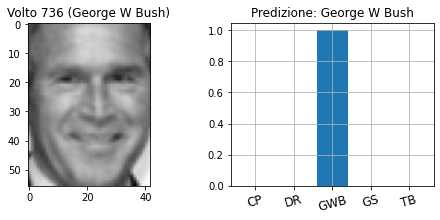

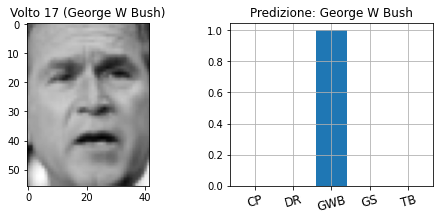

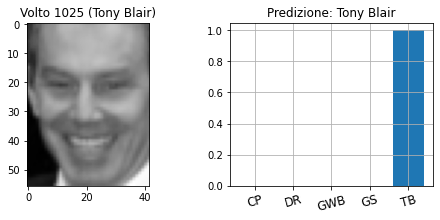

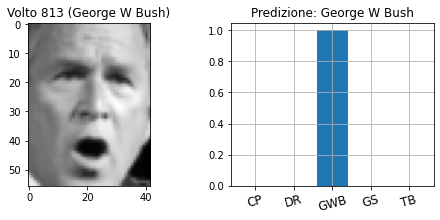

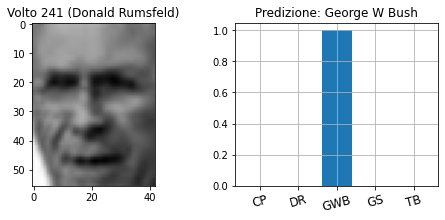

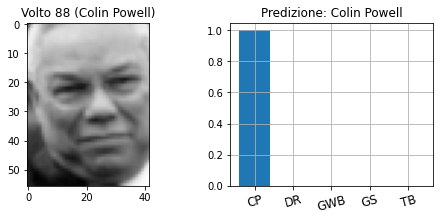

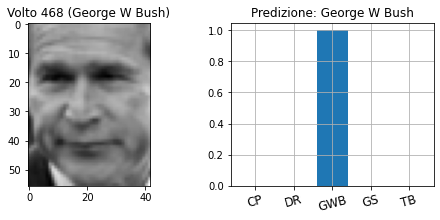

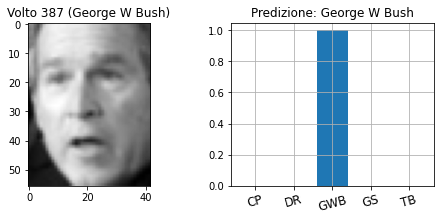

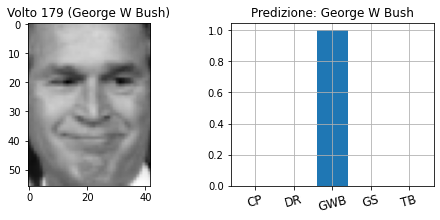

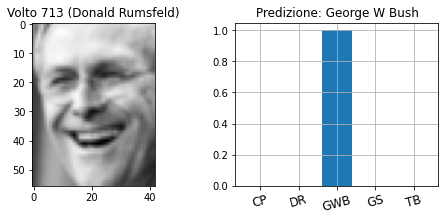

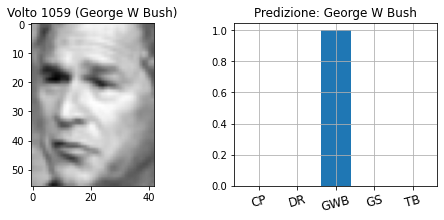

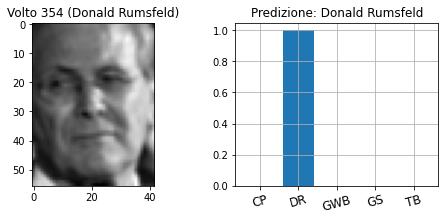

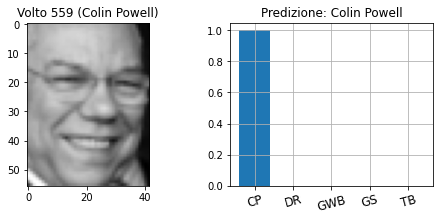

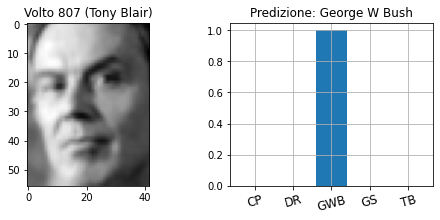

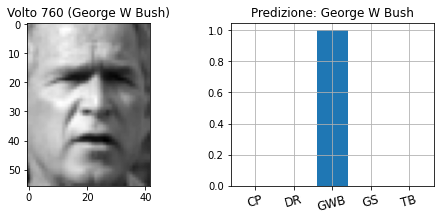

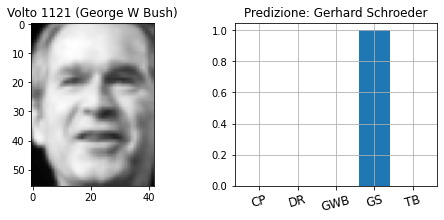

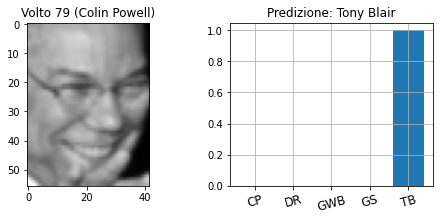

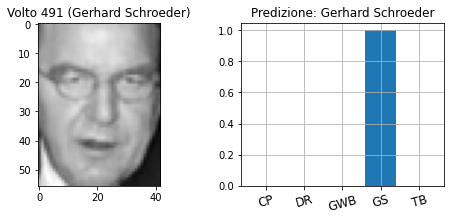

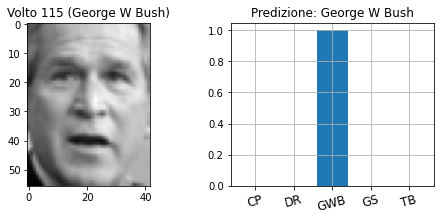

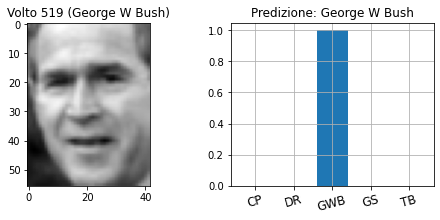

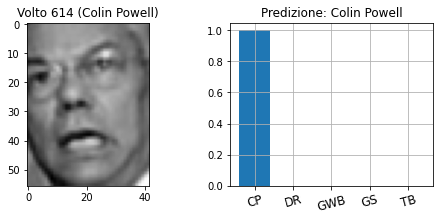

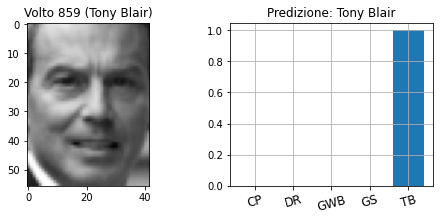

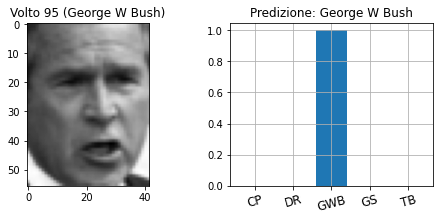

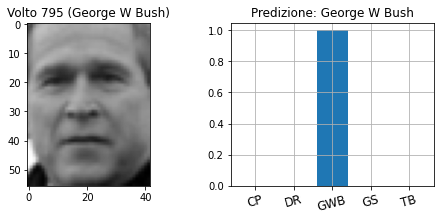

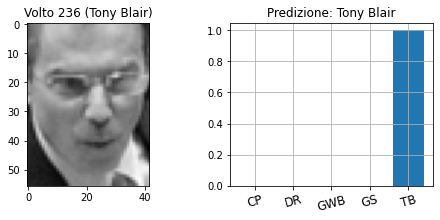

In [7]:
# Abbreviazione nomi per etichette in barplot
face_tnames_short = []
for name in face_tnames:
    name_split = name.split(' ')
    nm = ''
    for word in name_split:
        nm = nm + word[0]
    face_tnames_short.append(nm)

# Selezione di "n_randsamples" volti random dal dataset

n_randsamples = 25
ind_test_rand = np.random.choice(len(face_targets), n_randsamples, replace=False)

# Matrice delle n_randsamples volti scelti (una riga, un volto)
rand_faces = face_data[ind_test_rand, :]
rand_targets = face_targets[ind_test_rand]

# Decision Function per i volti random:
rand_faces_decision = mlp.predict_proba(pca.transform(rand_faces))
y_pred_rand_faces = mlp.predict(pca.transform(rand_faces))

for i in range(n_randsamples):
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    ii = ind_test_rand[i]
    face_ii = face_images[ii]
    
    axs[0].imshow(face_ii, cmap=plt.cm.gray)
    axs[0].set_title('Volto {} ({})'.format(ii, face_tnames[face_targets[ii]]))
    
    axs[1].bar(np.arange(len(face_tnames)),
               rand_faces_decision[i, :]
              )
    axs[1].grid()
    axs[1].set_xticks(np.arange(len(face_tnames)))
    axs[1].set_xticklabels(face_tnames_short,
                           rotation=15,
                           fontsize=12
                          )
    axs[1].set_title('Predizione: {}'.format(face_tnames[y_pred_rand_faces[i]]))
    
plt.show()